 ## 1. Algorithme Perceptron Simple

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import *

from scipy.io import loadmat

### 1.1 Mise en place d’un perceptron simple
On crée la fonction perceptron simple

In [19]:
def perceptron(x,w,active):
    x0=np.concatenate(([1],x))
    v=np.sum(np.multiply(x0,w))
   
    if active==0:
        y=np.sign(v);
    if active==1:
        y=np.tanh(v)

    return y

### 1.2 Etude de l’apprentissage


In [39]:
def apprentissage_simple(x,yd):

    w= np.random.rand(1,3)-0.5
    alpha=0.1
    mdiff=1
    iter=0
    nx = x.shape[1]
    mdiff=np.zeros(100)
    nbErr = 1
    while ((iter<100) and (nbErr !=0)): 
        
        for b in range(0,nx):
            y=perceptron(x[:,b],w,0) 
            err =(yd[b]-y)
           
            mdiff[iter]=mdiff[iter]+(yd[b]-y)**2
            #StratÃ©goe Online
            #print([y,yd[b]])
            w=w+alpha*err*(np.concatenate(([1],x[:,b])))
            
            #print(w)
        nbErr = mdiff[iter] 
        iter=iter+1

    return w, mdiff

def affiche_classe(x,clas,K,w):

    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0,0]-w[0,1]*np.min(x[0,:]))/w[0,2],(-w[0,0]-w[0,1]*np.max(x[0,:]))/w[0,2]]
   
    plt.plot(t,z);
    
    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],"o")
    
    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],"x")
    plt.axis([np.min(x[0,:]),np.max(x[0,:]),np.min(x[1,:]),np.max(x[1,:])])
    plt.show()




#### 1.2.1 Test

-1.0
1.0
1.0
1.0


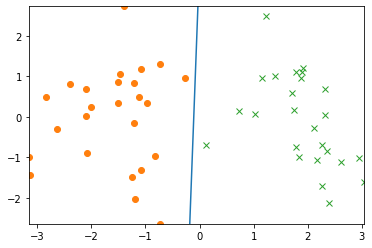

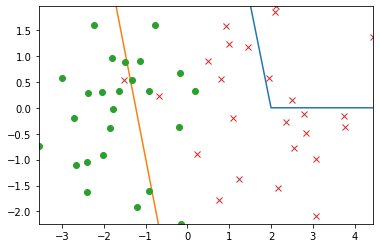

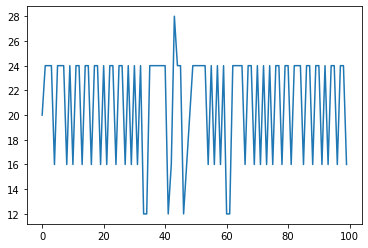

In [40]:
#Test du Ou Logic
w=[-0.5,1,1]
print(perceptron([0,0],w,0))
print(perceptron([0,1],w,0))
print(perceptron([1,0],w,0))
print(perceptron([1,1],w,0))
Data = np.loadtxt('p2_d1.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_simple(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);


Data = np.loadtxt('p2_d2.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_simple(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

In [67]:
def apprentissage_widrow_hoff(x,yd):

    w= np.random.rand(1,3)-0.5
    alpha=0.1
    mdiff=1
    iter=0
    nx = x.shape[1]
    mdiff=np.zeros(100)
    nbErr = 1
    while ((iter<100) and (nbErr !=0)): 
        
        for b in range(0,nx):
            y=perceptron(x[:,b],w,0) 
            err =-(yd[b]-y)*(1-np.power(y,2))
           
            mdiff[iter]=mdiff[iter]+(yd[b]-y)**2
            #StratÃ©goe Online
            #print([y,yd[b]])
            w=w+alpha*err*(np.concatenate(([1],x[:,b])))
            
            #print(w)
        nbErr = mdiff[iter] 
        iter=iter+1

    return w, mdiff
def affiche_classe(x,clas,K,w):

    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0,0]-w[0,1]*np.min(x[0,:]))/w[0,2],(-w[0,0]-w[0,1]*np.max(x[0,:]))/w[0,2]]
   
    plt.plot(t,z);
    
    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],"o")
    
    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],"x")
    plt.axis([np.min(x[0,:]),np.max(x[0,:]),np.min(x[1,:]),np.max(x[1,:])])
    plt.show()



-1.0
1.0
1.0
1.0


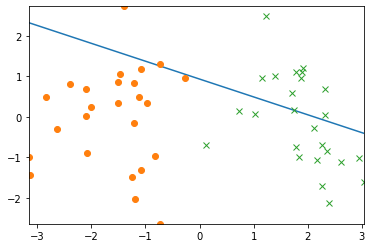

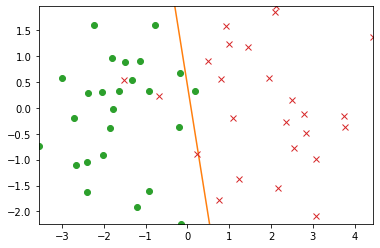

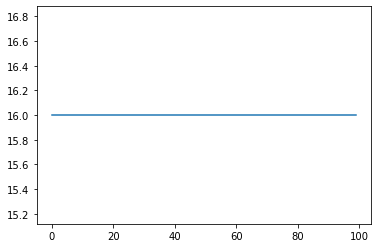

In [68]:
#Test du Ou Logic
w=[-0.5,1,1]
print(perceptron([0,0],w,0))
print(perceptron([0,1],w,0))
print(perceptron([1,0],w,0))
print(perceptron([1,1],w,0))
Data = np.loadtxt('p2_d1.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_widrow_hoff(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);


Data = np.loadtxt('p2_d2.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_widrow_hoff(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

### 1.3 Perceptron multicouches
#### 1.3.1 Mise en place d’un perceptron multicouche
On crée la fonction d'activation 

In [1]:
def phi(x):
    return 1/(1+np.exp(-x))

Après la foncton multiperceptron

In [3]:
def multiperceptron(x,w1,w2):
    x1= phi(np.dot(np.transpose(w1),np.append(1,x)))
    return phi(np.dot(np.transpose(w2),np.append(1,x1)))

Cette fonction est la multiplication matricielle de l’entrée x avec les poids  des deux neurones de la couche cachée. On rajoute 1 au vecteur d’entrée pour le poids donc on aura un vecteur  avec deux lignes. Ensuite on applique la fonction d’activation à ce vecteur afin de générer x1 qui va nous donner une nouvelle entrée pour le neurone de la couche de sortie.On rajoute encore 1 avant le x1 pour le poids et on refait le même principe sauf qu’il n’y a qu’un neurone sur la couche final donc on aura en sortie un scalaire.

On teste cette fonction avec l'exemple 

In [59]:
x=np.ones(2)
w1 = np.array([[-0.5,2,-1],[0.5,1,0.5]]).T
w2 = np.array([[2],[-1],[1]])
print(multiperceptron(x,w1,w2))


[0.90536731]


#### 1.3.2 *Programmation apprentissage multicouches*

In [153]:
def multiperceptron_widrow(x,yd):
    alpha = 0.5
    w1 = np.random.rand(3, 2)
    w2 = np.random.rand(3, 1)
    batch_size= x.shape[1]
    mdiff=1
    mdiff = np.zeros(100)
    iter=0
    nbErr=1
    while ((iter<100) and (nbErr!=0)):
        for k in range(batch_size):
            y=multiperceptron(x[:,k],w1,w2)
            error=yd[k]-y
            mdiff[iter]=mdiff[iter]+error**2
            w1[:,0]=w1[:,0]-alpha*error*(np.concatenate(([1],x[:,k])))
            w1[:,1]=w1[:,1]-alpha*error*(np.concatenate(([1],Data[:,k])))

        nbErr=mdiff[iter]
        iter=iter +1
    return error,w1



            

In [154]:
multiperceptron_widrow(Data,oracle)

<ipython-input-1-1a428ee899aa>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


(array([0.38463497]),
 array([[ 1760.89513326,  1760.68293987],
        [-4497.6863292 , -4497.7054934 ],
        [ -280.00046374,  -280.10968023]]))

In [92]:
w1 = np.array([[-0.5,2,-1],[0.5,1,0.5]]).T
w2 = np.array([[2],[-1],[1]])
y=multiperceptron(Data[:,1],w1,w2)


In [116]:
Data[1:].shape

(1, 50)

In [122]:
w1

array([[-0.5,  0.5],
       [ 2. ,  1. ],
       [-1. ,  0.5]])

In [124]:
w1[:,1]

array([0.5, 1. , 0.5])

In [133]:
error=3
alpha=0.5
w1[:,0]=w1[:,0]+alpha*error*(np.concatenate(([1],Data[:,0])))


In [134]:
w1

array([[ 1.        ,  0.5       ],
       [ 2.28012203,  1.        ],
       [-0.50889968,  0.5       ]])